In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT, CLASSES
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm


Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

Iterations: 100%|██████████| 10/10 [06:23<00:00, 38.34s/it]


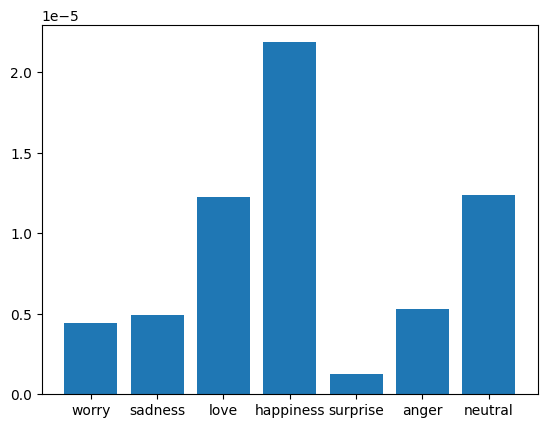

In [2]:
FOLDS = 6

class_max_abs_diff = [0 for _ in CLASSES]

for i in tqdm(range(10), desc="Iterations"):
    valids = []
    ds: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/train.tsv")
    for i in range(FOLDS):
        train, valid = ds.sfold(i, FOLDS)
        valids.append(valid)
        train_size = len(train)
        valid_size = len(valid)
        
        train_class_distribution = train.data["label"].value_counts()
        valid_class_distribution = valid.data["label"].value_counts()
        
        
        class_abs_diff = []
        for c in CLASSES:
            train_class_count = train_class_distribution.get(c, 0)
            valid_class_count = valid_class_distribution.get(c, 0)
            class_abs_diff.append(np.abs(train_class_count / train_size - valid_class_count / valid_size))

        class_max_abs_diff = np.maximum(class_max_abs_diff, class_abs_diff)    
        
        # check overlap
        train_x_set = set(train.data["text"])
        valid_x_set = set(valid.data["text"])
        overlap = train_x_set.intersection(valid_x_set)
        assert len(overlap) == 0, f"Overlap: {len(overlap)}"

    for i in range(FOLDS):
        for j in range(i + 1, FOLDS):
            valid_x_set_i = set(valids[i].data["text"])
            valid_x_set_j = set(valids[j].data["text"])
            overlap = valid_x_set_i.intersection(valid_x_set_j)
            assert len(overlap) == 0, f"Overlap: {len(overlap)}"
        

# old max = 0.0040
# new max = 0.000012
plt.bar(CLASSES, class_max_abs_diff)
plt.show()    
        